# Exercise 2: Data Processing and Visualisation

30/09/2022 (Author: Sophia Kuhn)

01/10/2023 (Upadte: Vera Balmer)

Course: Scientific Machine and Deep Learning for Design and Construction in Civil Engineering by M. A. Kraus, D. Griego and R. Rust

For Questions on this Exercise: vera.balmer@ai.ethz.ch

## Notebook Content
- 1.0 Introduction
    - 1.1 Exercise Objectives
    - 1.2 Introduction to Network Tied-Arch Bridge Data Set
    - 1.3 Import libraries
- 2.0 Data Pre-processing Example
    - 2.1 Load Data Set
    - 2.2 Identify numeric and non-numeric columns
    - 2.3 Selecting Properties
    - 2.4 Handling Missing Data
    - 2.5 Remove Duplicates
    - 2.6 Outliers
    - 2.7 Handling categorical variables 
    - 2.8 Data Transformation: Scaling and Standardization
- 3.0 Further Data Visualizations
    - 3.1 Scatterplot with visualization of categories 
    - 3.2 Swarm Plots
    - 3.3 Time Series Visualization



## 1.0 Introduction

### 1.1 Exercise Objective

- provide examples and syntax for data pre-processing and visualization
- introduction to useful packages



### 1.2 Introduction to Network Tied-Arch Bridge Data Set

To understand the concepts of data pre-processing and to learn useful visualization techniques we will use the example of a Network Tied-Arch Bridge Data Set. The raw data set [2] includes over 200 Network Tied-Arch Bridges with nearly 20 different bridge properties. Each row represents a bridge and each column represents a bridge property.

##### Network Tied-Arch Bridge Properties [1]


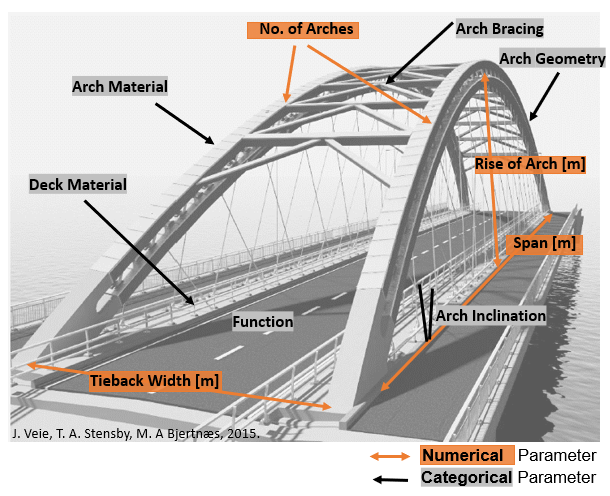

In [1]:
from IPython.display import Image
Image("BridgePropertiesDefinition.png")



### 1.3 Import Libraries

In [58]:
# import packages
# all these packages have been introduced in the last exercise
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt


## 2.0 Data Pre-processing Example 

A fundamental part of any machine/ deep learning project is the appropriate pre-processing of the raw data. In many data science projects, the data preparation takes a lot of time [6]. However, it is crucial because your analysis is only as good as your data.

Important note: There is not one correct approach to data pre-processing, rather it depends heavily on the data set and the subsequent application.

Building Blocks of a Data Cleaning Pipeline: (No stringent order) [7]
- Missing Value Treatment
- Noise Treatment
- Outlier Detection
- Segmentation
- Data smoothing and transformation
- Data reduction

We will go through a data pre-processing workflow by looking at the example data set of Network Tied-Arch Bridges [1].

You can also look for libraries for data pre-processing


### 2.1 Load Data Set

In [59]:
# import raw data set
df = pd.read_csv("NetworkTiedArchBridges_RawData.csv", delimiter=';') 

In [60]:
# show head of dataFrame
df.head()

Nr.                   Name    Year Country     Function Material Arch  \
0    3         Agoishi Bridge  1985.0   Japan  Road Bridge         Steel   
1    4         Aishima Bridge     NaN   Japan  Road Bridge         Steel   
2    5            Akio Bridge  1968.0   Japan  Road Bridge         Steel   
3    6  Amelia Earhart Bridge  2012.0     USA  Road Bridge         Steel   
4    7        Aonohara bridge     NaN   Japan  Road Bridge         Steel   

             Material Deck Coordinates N / S Coordinates E / W  Span [m]  \
0  Steel-Concrete Composit  34° 13' 11.52" N  135° 8' 44.43" E     163.4   
1                      NaN      38°10'10.6"N     140°50'31.5"E      85.0   
2  Steel-Concrete Composit  34° 26' 23.04" N  132° 29' 0.59" E     110.0   
3  Steel-Concrete Composit      39°33'34.0"N      95°06'48.4"W     160.6   
4                      NaN      35°33'38.4"N     139°10'46.1"E     152.0   

   Rise of Arch [m]  Rise-Span Ratio  Width Tie Backs [m]  Number of Arches  \
0              26.0         6.284615                10.25                 2   
1               NaN              NaN                10.25                 2   
2              17.0         6.470588                 6.00                 2   
3              26.5         6.060377                23.80                 2   
4               NaN              NaN                  NaN                 2   

  Geometry of Arch Horizontal Arch Inclination   Arch Bracing  Costs [€ ]  
0          Unknown                         Yes   Cross Girder         NaN  
1          Unknown                         Yes   Cross Girder         NaN  
2          Unknown                         Yes   Cross Girder         NaN  
3          Unknown                          No  Diamond Truss         NaN  
4          Unknown                          No  Diamond Truss         NaN

In [61]:
# print shape
df.shape

(204, 18)

In [62]:
# Structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nr.                          204 non-null    int64  
 1   Name                         204 non-null    object 
 2   Year                         174 non-null    float64
 3   Country                      204 non-null    object 
 4   Function                     204 non-null    object 
 5   Material Arch                204 non-null    object 
 6   Material Deck                139 non-null    object 
 7   Coordinates N / S            203 non-null    object 
 8   Coordinates E / W            203 non-null    object 
 9   Span [m]                     197 non-null    float64
 10  Rise of Arch [m]             87 non-null     float64
 11  Rise-Span Ratio              87 non-null     float64
 12  Width Tie Backs [m]          101 non-null    float64
 13  Number of Arches    

### 2.2 Identify numeric and non-numeric columns

In [63]:
# define function that selects numeric columns
def numCol(df):
    df_numeric = df.select_dtypes(include=[np.number])
    cols = df_numeric.columns.values
    return cols

# apply function
numeric_cols= numCol(df)
print(numeric_cols)

['Nr.' 'Year' 'Span [m]' 'Rise of Arch [m]' 'Rise-Span Ratio'
 'Width Tie Backs [m]' 'Number of Arches' 'Costs [€ ]']


In [64]:
# define function that selects non-numeric columns
def nonNumCol(df):
    df_non_numeric = df.select_dtypes(exclude=[np.number])
    cols = df_non_numeric.columns.values
    return cols

# apply function
non_numeric_cols= nonNumCol(df)
print(non_numeric_cols)

['Name' 'Country' 'Function' 'Material Arch' 'Material Deck'
 'Coordinates N / S' 'Coordinates E / W' 'Geometry of Arch'
 'Horizontal Arch Inclination' 'Arch Bracing']


###  2.3 Selecting Properties


A first step for pre-processing can be to select the properties that are relevant and should be kept of the data set. There are several reasons for removing a property from the data set:
- irrelevant or redundant for application
- single unique value column
- too many missing data
- strong similarity to other existing property
- includes too many errors
- ....

Note that here the reduction of the dimensionality of our data set is done manually, as the size and the application of the example allows it. However, later in this class we will learn about dimensionality reduction algorithms to do this in a smart and automated way.


##### Irrelevant properties

Removing irrelevant or redundant data from your set can help improve the predictive speed, reduce time to build the predictive model and can reduce unnecessary noise.

In [65]:
df.head()

Nr.                   Name    Year Country     Function Material Arch  \
0    3         Agoishi Bridge  1985.0   Japan  Road Bridge         Steel   
1    4         Aishima Bridge     NaN   Japan  Road Bridge         Steel   
2    5            Akio Bridge  1968.0   Japan  Road Bridge         Steel   
3    6  Amelia Earhart Bridge  2012.0     USA  Road Bridge         Steel   
4    7        Aonohara bridge     NaN   Japan  Road Bridge         Steel   

             Material Deck Coordinates N / S Coordinates E / W  Span [m]  \
0  Steel-Concrete Composit  34° 13' 11.52" N  135° 8' 44.43" E     163.4   
1                      NaN      38°10'10.6"N     140°50'31.5"E      85.0   
2  Steel-Concrete Composit  34° 26' 23.04" N  132° 29' 0.59" E     110.0   
3  Steel-Concrete Composit      39°33'34.0"N      95°06'48.4"W     160.6   
4                      NaN      35°33'38.4"N     139°10'46.1"E     152.0   

   Rise of Arch [m]  Rise-Span Ratio  Width Tie Backs [m]  Number of Arches  \
0              26.0         6.284615                10.25                 2   
1               NaN              NaN                10.25                 2   
2              17.0         6.470588                 6.00                 2   
3              26.5         6.060377                23.80                 2   
4               NaN              NaN                  NaN                 2   

  Geometry of Arch Horizontal Arch Inclination   Arch Bracing  Costs [€ ]  
0          Unknown                         Yes   Cross Girder         NaN  
1          Unknown                         Yes   Cross Girder         NaN  
2          Unknown                         Yes   Cross Girder         NaN  
3          Unknown                          No  Diamond Truss         NaN  
4          Unknown                          No  Diamond Truss         NaN

In [66]:
# drop irrelevant column 
#df.drop(labels='Nr.', axis=1, inplace=True)
df.head(15)

Nr.                                    Name    Year         Country  \
0     3                          Agoishi Bridge  1985.0           Japan   
1     4                          Aishima Bridge     NaN           Japan   
2     5                             Akio Bridge  1968.0           Japan   
3     6                   Amelia Earhart Bridge  2012.0             USA   
4     7                         Aonohara bridge     NaN           Japan   
5     8  Arco Metalico Sobre La Autopista AP-68  2009.0           Spain   
6     9                            Åsnes Bridge  2011.0          Norway   
7    10                            Atera Bridge  2008.0           Japan   
8    11                    B6 Railroad Overpass  2009.0         Germany   
9    12                          Bamban Bridge   1998.0     Philippines   
10   13                          Bechyne Bridge  2004.0  Czech Republic   
11   14                           Bent Bridge 1  2011.0             USA   
12   15                           Bent Bridge 2  2011.0             USA   
13   16                  Bijulibazar Arc Bridge  2020.0           Nepal   
14   17           Blennerhassett Island Bridge   2008.0             USA   

             Function        Material Arch            Material Deck  \
0         Road Bridge                Steel  Steel-Concrete Composit   
1         Road Bridge                Steel                      NaN   
2         Road Bridge                Steel  Steel-Concrete Composit   
3         Road Bridge                Steel  Steel-Concrete Composit   
4         Road Bridge                Steel                      NaN   
5         Road Bridge                Steel  Steel-Concrete Composit   
6         Road Bridge                Steel  Steel-Concrete Composit   
7         Road Bridge                Steel                      NaN   
8      Railway Bridge                Steel      Reinforced Concrete   
9         Road Bridge                Steel                      NaN   
10        Road Bridge                Steel      Reinforced Concrete   
11  Pedestrian Bridge                Steel      Reinforced Concrete   
12  Pedestrian Bridge                Steel      Reinforced Concrete   
13        Road Bridge  Reinforced Concrete     Prestressed Concrete   
14        Road Bridge                Steel  Steel-Concrete Composit   

   Coordinates N / S  Coordinates E / W  Span [m]  Rise of Arch [m]  \
0   34° 13' 11.52" N   135° 8' 44.43" E    163.40              26.0   
1       38°10'10.6"N      140°50'31.5"E     85.00               NaN   
2   34° 26' 23.04" N   132° 29' 0.59" E    110.00              17.0   
3       39°33'34.0"N       95°06'48.4"W    160.60              26.5   
4       35°33'38.4"N      139°10'46.1"E    152.00               NaN   
5       41°41'08.2"N        0°57'10.1"W     71.00              14.0   
6       64°18'34.7"N       11°13'06.3"E    111.00              18.0   
7       35°40'09.1"N      137°37'27.6"E    145.00               NaN   
8   51° 27' 47.68" N    12° 0' 13.20" E     79.00               NaN   
9   15° 15' 37.51" N  120° 33' 35.21" E    174.00               NaN   
10  49° 17' 30.15" N   14° 28' 10.02" E     41.00               NaN   
11      37°19'33.7"N      121°51'38.9"W     82.30               6.7   
12      37°19'33.7"N      121°51'38.9"W     82.30               6.7   
13      27°41'25.6"N       85°19'41.8"E     51.45               NaN   
14  39° 16' 29.00" N   81° 38' 49.00" W    267.80              53.3   

    Rise-Span Ratio  Width Tie Backs [m]  Number of Arches Geometry of Arch  \
0          6.284615                10.25                 2          Unknown   
1               NaN                10.25                 2          Unknown   
2          6.470588                 6.00                 2          Unknown   
3          6.060377                23.80                 2          Unknown   
4               NaN                  NaN                 2          Unknown   
5          5.071429                10.00               

##### Removing columns with a single unique value

In [67]:
# drop all column containing only one unique value
# find single unique value column
col_sv=df.columns[df.nunique() == 1]
print('The follwoing column(s) contain only one unique value:',col_sv)

The follwoing column(s) contain only one unique value: Index(['Number of Arches'], dtype='object')


In [68]:
#drop single unique value columns
df.drop(labels=col_sv, axis=1, inplace=True)
df.head()

Nr.                   Name    Year Country     Function Material Arch  \
0    3         Agoishi Bridge  1985.0   Japan  Road Bridge         Steel   
1    4         Aishima Bridge     NaN   Japan  Road Bridge         Steel   
2    5            Akio Bridge  1968.0   Japan  Road Bridge         Steel   
3    6  Amelia Earhart Bridge  2012.0     USA  Road Bridge         Steel   
4    7        Aonohara bridge     NaN   Japan  Road Bridge         Steel   

             Material Deck Coordinates N / S Coordinates E / W  Span [m]  \
0  Steel-Concrete Composit  34° 13' 11.52" N  135° 8' 44.43" E     163.4   
1                      NaN      38°10'10.6"N     140°50'31.5"E      85.0   
2  Steel-Concrete Composit  34° 26' 23.04" N  132° 29' 0.59" E     110.0   
3  Steel-Concrete Composit      39°33'34.0"N      95°06'48.4"W     160.6   
4                      NaN      35°33'38.4"N     139°10'46.1"E     152.0   

   Rise of Arch [m]  Rise-Span Ratio  Width Tie Backs [m] Geometry of Arch  \
0              26.0         6.284615                10.25          Unknown   
1               NaN              NaN                10.25          Unknown   
2              17.0         6.470588                 6.00          Unknown   
3              26.5         6.060377                23.80          Unknown   
4               NaN              NaN                  NaN          Unknown   

  Horizontal Arch Inclination   Arch Bracing  Costs [€ ]  
0                         Yes   Cross Girder         NaN  
1                         Yes   Cross Girder         NaN  
2                         Yes   Cross Girder         NaN  
3                          No  Diamond Truss         NaN  
4                          No  Diamond Truss         NaN

### 2.4 Handling Missing Data
The majority of machine/ deep learning algorithms can't handle missing data. Therefore, it is crucial to identify the missing data and then handle it in an appropriate way. Missing data are Null Values which are represented in python by `NaN`.

#### Identify missing data [4]

##### Count Null Values
You can identify missing data by counting the null values in each column.

In [69]:
#count number of missing data per column
df.isnull().sum()

Nr.                              0
Name                             0
Year                            30
Country                          0
Function                         0
Material Arch                    0
Material Deck                   65
Coordinates N / S                1
Coordinates E / W                1
Span [m]                         7
Rise of Arch [m]               117
Rise-Span Ratio                117
Width Tie Backs [m]            103
Geometry of Arch                 0
Horizontal Arch Inclination      0
Arch Bracing                     2
Costs [€ ]                     193
dtype: int64

##### Percentage of Null Values
To make it more comprehensible you can calculate the percentage of missing data in each column.

In [70]:
# missing data percentage list
for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing*100)))

Nr. - 0%
Name - 0%
Year - 15%
Country - 0%
Function - 0%
Material Arch - 0%
Material Deck - 32%
Coordinates N / S - 0%
Coordinates E / W - 0%
Span [m] - 3%
Rise of Arch [m] - 57%
Rise-Span Ratio - 57%
Width Tie Backs [m] - 50%
Geometry of Arch - 0%
Horizontal Arch Inclination - 0%
Arch Bracing - 1%
Costs [€ ] - 95%


##### Heat map visualization of missing values
Alternatively, you can use a heatmap to visualize the missing data in a data set. Yellow is missing. Blue is not missing.

To plot the heat map a function from the plotting library seaborn is used. Therefore, this library must be first installed and imported:

In [71]:
# conda install -c anaconda seaborn

In [72]:
import seaborn as sns

<AxesSubplot: >

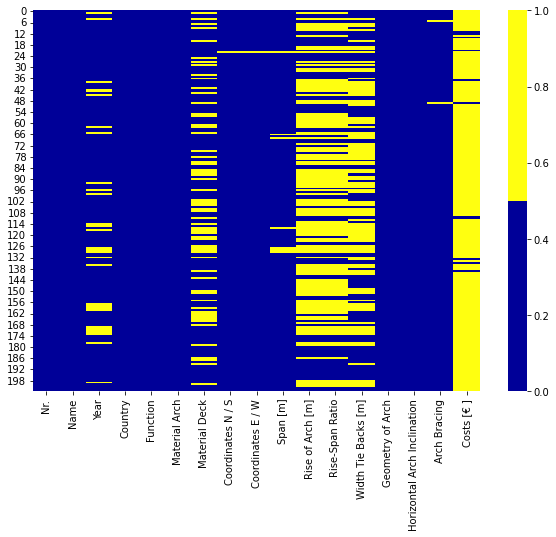

In [74]:
# using a heat map to visualize missing data
cols = df.columns # first 30 columns
colours = ['#000098', '#ffff10'] # specify the colours - yellow is missing. blue is not missing.

fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours), ax=ax)

In [75]:
# show head of dataFrame
df.head()

Nr.                   Name    Year Country     Function Material Arch  \
0    3         Agoishi Bridge  1985.0   Japan  Road Bridge         Steel   
1    4         Aishima Bridge     NaN   Japan  Road Bridge         Steel   
2    5            Akio Bridge  1968.0   Japan  Road Bridge         Steel   
3    6  Amelia Earhart Bridge  2012.0     USA  Road Bridge         Steel   
4    7        Aonohara bridge     NaN   Japan  Road Bridge         Steel   

             Material Deck Coordinates N / S Coordinates E / W  Span [m]  \
0  Steel-Concrete Composit  34° 13' 11.52" N  135° 8' 44.43" E     163.4   
1                      NaN      38°10'10.6"N     140°50'31.5"E      85.0   
2  Steel-Concrete Composit  34° 26' 23.04" N  132° 29' 0.59" E     110.0   
3  Steel-Concrete Composit      39°33'34.0"N      95°06'48.4"W     160.6   
4                      NaN      35°33'38.4"N     139°10'46.1"E     152.0   

   Rise of Arch [m]  Rise-Span Ratio  Width Tie Backs [m] Geometry of Arch  \
0              26.0         6.284615                10.25          Unknown   
1               NaN              NaN                10.25          Unknown   
2              17.0         6.470588                 6.00          Unknown   
3              26.5         6.060377                23.80          Unknown   
4               NaN              NaN                  NaN          Unknown   

  Horizontal Arch Inclination   Arch Bracing  Costs [€ ]  
0                         Yes   Cross Girder         NaN  
1                         Yes   Cross Girder         NaN  
2                         Yes   Cross Girder         NaN  
3                          No  Diamond Truss         NaN  
4                          No  Diamond Truss         NaN

In [76]:
# replacing invalid values
df.replace('Unknown', np.nan, inplace=True)

<AxesSubplot: >

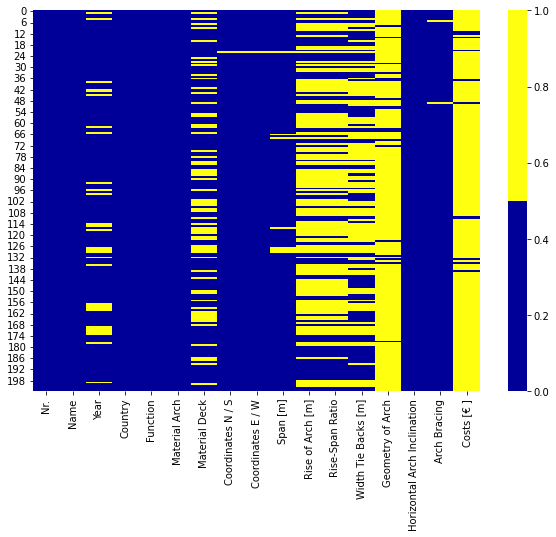

In [78]:
fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours), ax=ax)

#### Handling of Missing Data [5]

There are several ways to handle missing data:
- dropping rows and columns that contain null values
- complete data set (research, redo experiment,...)
- Imputation: replacing missing daza with substitude values (mean,k-nearest-neighbour,..)
- using algorithms that support missing values
- prediction of missing values
- mixture of the above
- ...


##### Drop all rows and columns that contain missing data

In [79]:
df_Dropped=df.dropna()
df_Dropped.head()

Nr.                                   Name    Year  Country     Function  \
14    17          Blennerhassett Island Bridge   2008.0      USA  Road Bridge   
135  142  Saalebrücke der Ortsumgehung Bernburg  2014.0  Germany  Road Bridge   

    Material Arch            Material Deck Coordinates N / S  \
14          Steel  Steel-Concrete Composit  39° 16' 29.00" N   
135         Steel  Steel-Concrete Composit  51° 48' 21.93" N   

     Coordinates E / W  Span [m]  Rise of Arch [m]  Rise-Span Ratio  \
14    81° 38' 49.00" W     267.8              53.3         5.024390   
135  11° 46' 55.81" E      101.0              15.5         6.516129   

     Width Tie Backs [m] Geometry of Arch Horizontal Arch Inclination  \
14                 32.60        Parabolic                          No   
135                16.35         Circular                          No   

      Arch Bracing   Costs [€ ]  
14   Diamond Truss  120000000.0  
135  Diamond Truss    8000000.0

In our Field where data is often sparse: Drop missing data wisely. Aim: Keep as many bridges as possible while also keeping as many important properties as possible. Always keep in mind the subsequent application of the data set and use your domain knowledge.

##### Dropping columns with very few data

In [80]:
#drop columns with too much missing data (>80%)
a = 0.2* df.shape[0]
print('Drop Threshold:',a)
# drops columns that have less real values than the selected threshold
df.dropna(axis=1, thresh=a, inplace=True)
df.head()

Drop Threshold: 40.800000000000004


Nr.                   Name    Year Country     Function Material Arch  \
0    3         Agoishi Bridge  1985.0   Japan  Road Bridge         Steel   
1    4         Aishima Bridge     NaN   Japan  Road Bridge         Steel   
2    5            Akio Bridge  1968.0   Japan  Road Bridge         Steel   
3    6  Amelia Earhart Bridge  2012.0     USA  Road Bridge         Steel   
4    7        Aonohara bridge     NaN   Japan  Road Bridge         Steel   

             Material Deck Coordinates N / S Coordinates E / W  Span [m]  \
0  Steel-Concrete Composit  34° 13' 11.52" N  135° 8' 44.43" E     163.4   
1                      NaN      38°10'10.6"N     140°50'31.5"E      85.0   
2  Steel-Concrete Composit  34° 26' 23.04" N  132° 29' 0.59" E     110.0   
3  Steel-Concrete Composit      39°33'34.0"N      95°06'48.4"W     160.6   
4                      NaN      35°33'38.4"N     139°10'46.1"E     152.0   

   Rise of Arch [m]  Rise-Span Ratio  Width Tie Backs [m]  \
0              26.0         6.284615                10.25   
1               NaN              NaN                10.25   
2              17.0         6.470588                 6.00   
3              26.5         6.060377                23.80   
4               NaN              NaN                  NaN   

  Horizontal Arch Inclination   Arch Bracing  
0                         Yes   Cross Girder  
1                         Yes   Cross Girder  
2                         Yes   Cross Girder  
3                          No  Diamond Truss  
4                          No  Diamond Truss

<AxesSubplot: >

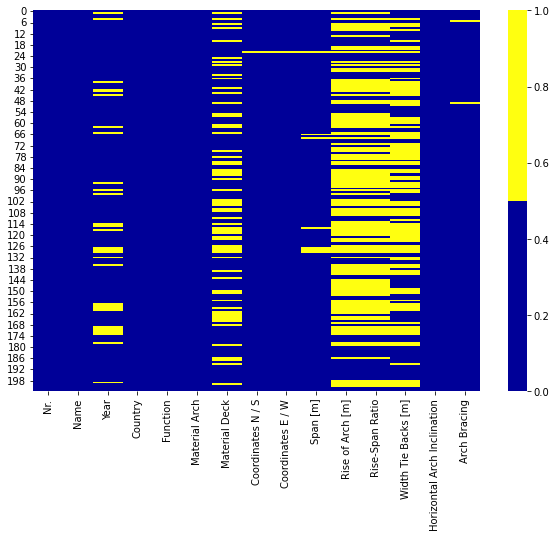

In [81]:
cols=df.columns

fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours), ax=ax)

The properties `Rise of Arch [m]`, `Rise-Span Ratio` and `Width Tie Backs [m]` exhibit many missing values. However, as we see them as an important bridge property which is crucial for the subsequent application we keep this property column.

##### Removing bridges with missing data in remaining properties

In [82]:
# removing all rows with missing data
df.dropna(axis=0, inplace= True)
df.head()

Nr.                   Name    Year Country           Function  \
0     3         Agoishi Bridge  1985.0   Japan        Road Bridge   
2     5            Akio Bridge  1968.0   Japan        Road Bridge   
3     6  Amelia Earhart Bridge  2012.0     USA        Road Bridge   
6     9           Åsnes Bridge  2011.0  Norway        Road Bridge   
11   14          Bent Bridge 1  2011.0     USA  Pedestrian Bridge   

   Material Arch            Material Deck Coordinates N / S Coordinates E / W  \
0          Steel  Steel-Concrete Composit  34° 13' 11.52" N  135° 8' 44.43" E   
2          Steel  Steel-Concrete Composit  34° 26' 23.04" N  132° 29' 0.59" E   
3          Steel  Steel-Concrete Composit      39°33'34.0"N      95°06'48.4"W   
6          Steel  Steel-Concrete Composit      64°18'34.7"N      11°13'06.3"E   
11         Steel      Reinforced Concrete      37°19'33.7"N     121°51'38.9"W   

    Span [m]  Rise of Arch [m]  Rise-Span Ratio  Width Tie Backs [m]  \
0      163.4              26.0         6.284615                10.25   
2      110.0              17.0         6.470588                 6.00   
3      160.6              26.5         6.060377                23.80   
6      111.0              18.0         6.166667                 9.00   
11      82.3               6.7        12.283582                 4.20   

   Horizontal Arch Inclination   Arch Bracing  
0                          Yes   Cross Girder  
2                          Yes   Cross Girder  
3                           No  Diamond Truss  
6                           No        K-Truss  
11                         Yes  Diamond Truss

In [83]:
# final dimension of dataFrame
df.shape

(66, 15)

In [84]:
df.isnull().sum()

Nr.                            0
Name                           0
Year                           0
Country                        0
Function                       0
Material Arch                  0
Material Deck                  0
Coordinates N / S              0
Coordinates E / W              0
Span [m]                       0
Rise of Arch [m]               0
Rise-Span Ratio                0
Width Tie Backs [m]            0
Horizontal Arch Inclination    0
Arch Bracing                   0
dtype: int64

<AxesSubplot: >

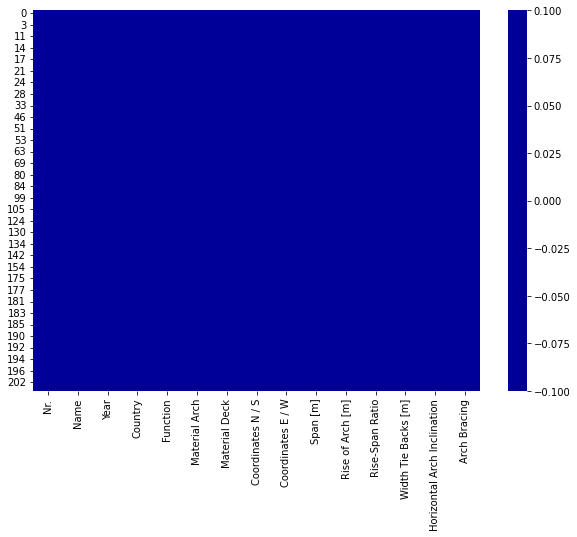

In [86]:
cols=df.columns

fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours[:-1]), ax=ax)

Increase Number of samplesby using Imputation methods (mean,k-nearest-neighbour,..)

### 2.5 Remove Duplicates
Sometimes it happens that duplicates are present in the data set. These can be identified and removed from the data set.


In [28]:
df.shape

(66, 15)

In [29]:
# check for duplicates
df. duplicated().sum()

0

In [30]:
# remove duplicates
df=df.drop_duplicates()
df.shape

(66, 15)

### 2.6 Outliers 

Outliers are data points that lie abnormally far away from the other values of the data set. However, it is up to the analysist to define what is considered as abnormal and therefore classified as outlier.

#### How to detect Outliers using data distribution visualization methods
How you can detect outliers depends if your property is numeric or categorial.

For numerical data we can use:
- Histograms
- Boxplots
- Descriptive Statistics

For categorical data we can use:
- Bar charts

#### What to do about outliers
The right solution to handle outliers depends highly on the data set and the goal of the project. The options how to handle outliers are similar to the missing data: drop, adjust or keep.


##### Histogram

array([[<AxesSubplot: title={'center': 'Nr.'}>,
        <AxesSubplot: title={'center': 'Year'}>],
       [<AxesSubplot: title={'center': 'Span [m]'}>,
        <AxesSubplot: title={'center': 'Rise of Arch [m]'}>],
       [<AxesSubplot: title={'center': 'Rise-Span Ratio'}>,
        <AxesSubplot: title={'center': 'Width Tie Backs [m]'}>]],
      dtype=object)

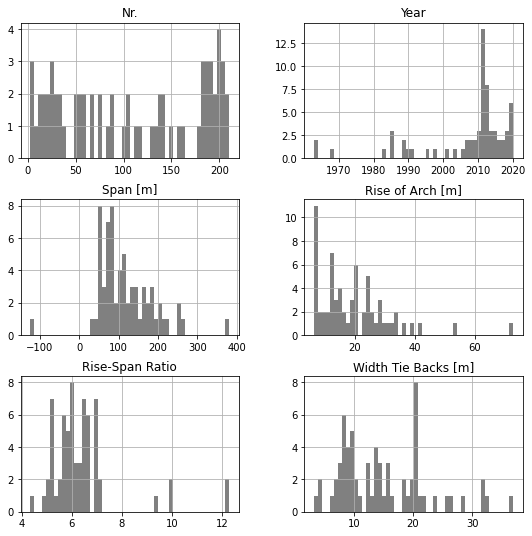

In [31]:
# histogram of all numerical properties
df.hist(bins=50, figsize=(9,9), color='grey')

In [87]:
# handle(remove/adjust/keep) outliers
df['Span [m]'].replace(-123, 123, inplace=True)

array([[<AxesSubplot: title={'center': 'Span [m]'}>]], dtype=object)

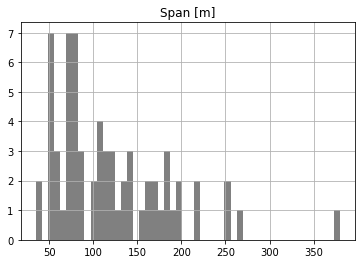

In [88]:
# histogram of one numerical property
df.hist('Span [m]', bins=50, color='grey')

##### Box Plot

In [34]:
# box plot of all numerical property
df.boxplot(figsize=(10,5))

<AxesSubplot: >

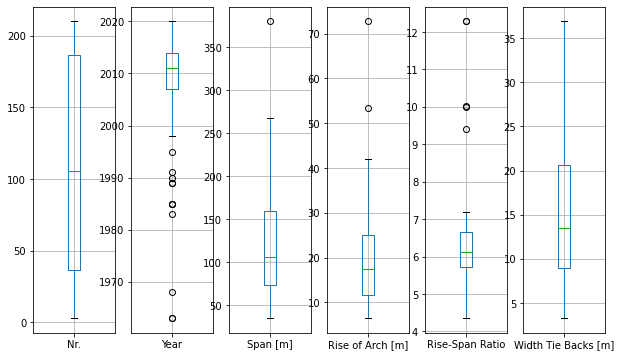

In [90]:
# individual box plots of all numerical property

# select numeric columns
numeric_cols = numCol(df)


# loop through numeric columns and create each box plot
fig=plt.figure()
fig.set_size_inches(12, 6)
gs = fig.add_gridspec(1, 7)

for i,col in enumerate(numeric_cols):
    ax0 = fig.add_subplot(gs[0, i])
    df.boxplot(column=col,figsize=(10,5))

##### Bar Chart

In [36]:
# select non-numeric columns
non_numeric_cols = nonNumCol(df)
print(non_numeric_cols)

['Name' 'Country' 'Function' 'Material Arch' 'Material Deck'
 'Coordinates N / S' 'Coordinates E / W' 'Horizontal Arch Inclination'
 'Arch Bracing']


In [37]:
#define selected categorical columns
cat_cols= ['Function', 'Material Arch','Material Deck','Horizontal Arch Inclination','Arch Bracing']


# loop through categorical columns and create each bar plot
# define Function
def plotCatBarCharts(cat_cols):
    fig=plt.figure()
    fig.set_size_inches(12, 5)
    gs = fig.add_gridspec(2, 3)

    for i,col in enumerate(cat_cols):
        if i<=2:
            ax = fig.add_subplot(gs[0, i])
        else:
            ax = fig.add_subplot(gs[1, i-3])

        ax = sns.countplot(y=col, data=df,color='grey')

        ax.set_xlabel('Number of Bridges')
        ax.grid(True,linestyle='-',color='0.75')

    plt.tight_layout()
    
    return 

# apply function
plotCatBarCharts(cat_cols)


In [38]:
# correction of misspellings
df.replace('Steel-Concrete Composit', 'Steel-Concrete Composite', inplace=True)
#df.replace('Steel Concrete Composit','Steel-Concrete Composite', inplace=True)
df.replace('Reinfoced Concrete','Reinforced Concrete', inplace=True)

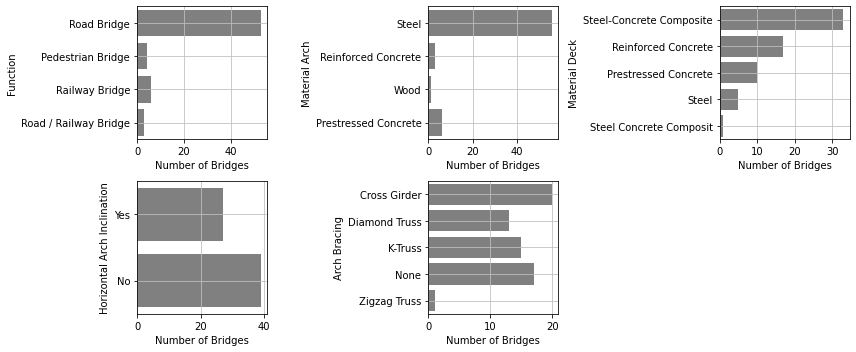

In [39]:
plotCatBarCharts(cat_cols)

### 2.7 Handling categorical variables 

Most Machine and Deep learning algorithms can only handle numerical data. However, in many real world data sets also categorical features are present. Therefore we need to transform the categorical data into numerical features. A very often applied method is to create dummy variables for each category.

#### Dummy Variables (One-hot-encoding)


In [40]:
# get dummy variables of 'Material Deck' property
df_matDeck_dummies = pd.get_dummies(df, columns = ['Material Deck'])
df_matDeck_dummies.head()

Nr.                   Name    Year Country           Function  \
0     3         Agoishi Bridge  1985.0   Japan        Road Bridge   
2     5            Akio Bridge  1968.0   Japan        Road Bridge   
3     6  Amelia Earhart Bridge  2012.0     USA        Road Bridge   
6     9           Åsnes Bridge  2011.0  Norway        Road Bridge   
11   14          Bent Bridge 1  2011.0     USA  Pedestrian Bridge   

   Material Arch Coordinates N / S Coordinates E / W  Span [m]  \
0          Steel  34° 13' 11.52" N  135° 8' 44.43" E     163.4   
2          Steel  34° 26' 23.04" N  132° 29' 0.59" E     110.0   
3          Steel      39°33'34.0"N      95°06'48.4"W     160.6   
6          Steel      64°18'34.7"N      11°13'06.3"E     111.0   
11         Steel      37°19'33.7"N     121°51'38.9"W      82.3   

    Rise of Arch [m]  Rise-Span Ratio  Width Tie Backs [m]  \
0               26.0         6.284615                10.25   
2               17.0         6.470588                 6.00   
3               26.5         6.060377                23.80   
6               18.0         6.166667                 9.00   
11               6.7        12.283582                 4.20   

   Horizontal Arch Inclination   Arch Bracing  \
0                          Yes   Cross Girder   
2                          Yes   Cross Girder   
3                           No  Diamond Truss   
6                           No        K-Truss   
11                         Yes  Diamond Truss   

    Material Deck_Prestressed Concrete  Material Deck_Reinforced Concrete  \
0                                    0                                  0   
2                                    0                                  0   
3                                    0                                  0   
6                                    0                                  0   
11                                   0                                  1   

    Material Deck_Steel  Material Deck_Steel Concrete Composit  \
0                     0                                      0   
2                     0                                      0   
3                     0                                      0   
6                     0                                      0   
11                    0                                      0   

    Material Deck_Steel-Concrete Composite  
0                                        1  
2                                        1  
3                                        1  
6                                        1  
11                                       0

In [41]:
# get dummy variables of all categorical properties
df_dummy = pd.get_dummies(df, columns = cat_cols)
df_dummy.head()

Nr.                   Name    Year Country Coordinates N / S  \
0     3         Agoishi Bridge  1985.0   Japan  34° 13' 11.52" N   
2     5            Akio Bridge  1968.0   Japan  34° 26' 23.04" N   
3     6  Amelia Earhart Bridge  2012.0     USA      39°33'34.0"N   
6     9           Åsnes Bridge  2011.0  Norway      64°18'34.7"N   
11   14          Bent Bridge 1  2011.0     USA      37°19'33.7"N   

   Coordinates E / W  Span [m]  Rise of Arch [m]  Rise-Span Ratio  \
0   135° 8' 44.43" E     163.4              26.0         6.284615   
2   132° 29' 0.59" E     110.0              17.0         6.470588   
3       95°06'48.4"W     160.6              26.5         6.060377   
6       11°13'06.3"E     111.0              18.0         6.166667   
11     121°51'38.9"W      82.3               6.7        12.283582   

    Width Tie Backs [m]  ...  Material Deck_Steel  \
0                 10.25  ...                    0   
2                  6.00  ...                    0   
3                 23.80  ...                    0   
6                  9.00  ...                    0   
11                 4.20  ...                    0   

    Material Deck_Steel Concrete Composit  \
0                                       0   
2                                       0   
3                                       0   
6                                       0   
11                                      0   

    Material Deck_Steel-Concrete Composite  Horizontal Arch Inclination_No  \
0                                        1                               0   
2                                        1                               0   
3                                        1                               1   
6                                        1                               1   
11                                       0                               0   

    Horizontal Arch Inclination_Yes  Arch Bracing_Cross Girder  \
0                                 1                          1   
2                                 1                          1   
3                                 0                          0   
6                                 0                          0   
11                                1                          0   

    Arch Bracing_Diamond Truss  Arch Bracing_K-Truss  Arch Bracing_None  \
0                            0                     0                  0   
2                            0                     0                  0   
3                            1                     0                  0   
6                            0                     1                  0   
11                           1                     0                  0   

    Arch Bracing_Zigzag Truss  
0                           0  
2                           0  
3                           0  
6                           0  
11                          0  

[5 rows x 30 columns]

In [42]:
df_dummy.nunique()

Nr.                                       66
Name                                      65
Year                                      26
Country                                   16
Coordinates N / S                         54
Coordinates E / W                         59
Span [m]                                  49
Rise of Arch [m]                          46
Rise-Span Ratio                           52
Width Tie Backs [m]                       48
Function_Pedestrian Bridge                 2
Function_Railway Bridge                    2
Function_Road / Railway Bridge             2
Function_Road Bridge                       2
Material Arch_Prestressed Concrete         2
Material Arch_Reinforced Concrete          2
Material Arch_Steel                        2
Material Arch_Wood                         2
Material Deck_Prestressed Concrete         2
Material Deck_Reinforced Concrete          2
Material Deck_Steel                        2
Material Deck_Steel Concrete Composit      2
Material D


### 2.8 Data Transformation: Scaling and Standardization

We have seen that the continuous bridge properties exhibit very different ranges and distributions. For some algorithms the properties must be comparable to each other. An example for which this is the case are clustering algorithms such as k-Means. Therefore, many applications require transformation of the data before the data can be fed to the algorithm.




<AxesSubplot: >

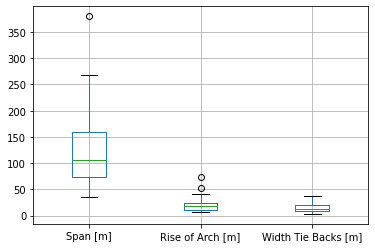

In [43]:
# select the properties that should be transformed
cols=['Span [m]', 'Rise of Arch [m]', 'Width Tie Backs [m]']
df[cols].boxplot()

##### Install  scikit-learn library:

In [44]:
# conda install -c anaconda scikit-learn

##### Scaling Data (0 to1)

In [99]:
df=df.rename(columns={"Span [m]": "Span [stand]", "Rise of Arch [m]": "Rise of Arch [stand]", "Width Tie Backs [m]":"Width Tie Backs [stand]"})

<AxesSubplot: >

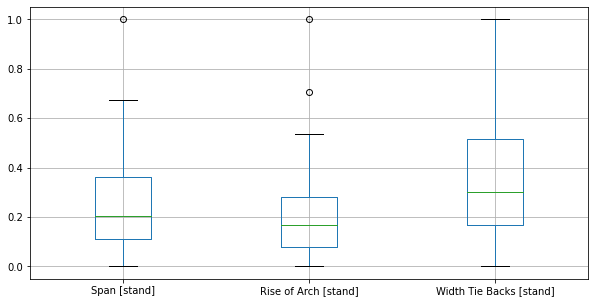

In [100]:
#import MinMaxScaler from sklearn library
from sklearn.preprocessing import MinMaxScaler

# select the properties that should be scaled
cols=['Span [stand]', 'Rise of Arch [stand]', 'Width Tie Backs [stand]']

# Create Scaler object
scaler = MinMaxScaler(feature_range=(0, 1))
# fit scaler object to data
scaler.fit(df[cols])
#scale chosen properties
df_scaled = pd.DataFrame(scaler.transform(df[cols]), columns=cols)

# inspect distribution
df_scaled.boxplot(figsize=(10,5))

##### Data Standardization

Transformation of the data so that for each property the mean value is 0 and the standard deviation is 1.

$z=\frac{x_{i}-\mu}{\sigma}$

0             1             2
count  6.600000e+01  6.600000e+01  6.600000e+01
mean  -2.018587e-17 -2.052230e-16 -1.345725e-16
std    1.007663e+00  1.007663e+00  1.007663e+00
min   -1.299571e+00 -1.098961e+00 -1.570371e+00
25%   -7.044390e-01 -6.692096e-01 -8.128027e-01
50%   -2.126422e-01 -1.736668e-01 -2.070166e-01
75%    6.132702e-01  4.589410e-01  7.567340e-01
max    3.981983e+00  4.482327e+00  2.942802e+00

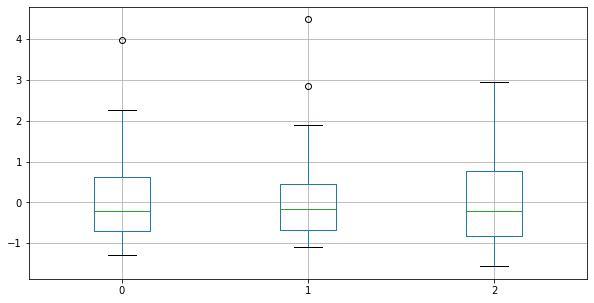

In [46]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

#Create standardScaler object
StandScaler=StandardScaler(with_mean=True, with_std=True, copy=True)
# fit object to data
StandScaler.fit(df[cols])
# standardize the data
df_stand=pd.DataFrame(StandScaler.transform(df[cols]))


# Inspect the standardized variables
df_stand.boxplot(figsize=(10,5))
df_stand.describe()


## 3.0 Further Data Visualisation


### 3.1 Scatterplot with visualization of categories [1]
A 2D-scatterplot is a good visualization method to see the relationship between two continuous variables. Additionally, a categorical property can be included by using colours and/or markers to identify the corresponding categories.


##### Defining plotting function

In [47]:
#defining markers/colors to identify categories
markers=['*', 's', '<', 'o', 'X', '8', 'p', 'h', 'H', 'D', 'd', 'P']
colorName = ['black','red','blue','green','purple']


#creating plotting function
def cat_plot_2D(Data, xAxis, yAxis,catProp):
    #Inputs: 
    #Data: DataFrame
    #xAxis: name of column in the Data that should be plotted on the x axis
    #yAxis: name of column in the Data that should be plotted on the y axis
    #catProp defines which categorical property should be colour coded in the plot

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    #get the categories of categorical property
    categories=Data.loc[:,catProp].unique()
    
    # create scatterplot for each category in one graph
    for i,j in enumerate(categories):
        #fliter dataset current category j
        dataSingleCat = Data[Data[catProp] == j]
        #extract x and y series
        x=dataSingleCat[xAxis]
        y=dataSingleCat[yAxis]
        #ceate individual scatter plot with color/marker coding
        ax.scatter(x  ,y,c=colorName[i],s=60,alpha=0.3,marker=markers[i],label=categories[i])  #col number
    #end:for j
    
    
    ax.set_xlabel(xAxis)
    ax.set_ylabel(yAxis)
    ax.grid(True,linestyle='-',color='0.75')
    plt.legend()
    plt.title(catProp)
    plt.show()
    
#end: def cat_plot_2D()


##### Create Plots

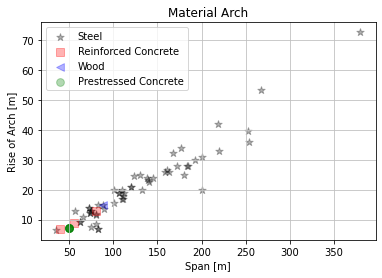

In [48]:
cat_plot_2D(Data=df, xAxis='Span [m]' ,yAxis='Rise of Arch [m]',
            catProp= 'Material Arch')

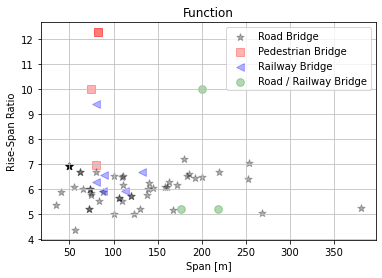

In [49]:
cat_plot_2D(Data=df, xAxis='Span [m]' ,yAxis='Rise-Span Ratio',
            catProp= 'Function')

### 3.2 Swarm Plots [1]
A nice method to show the distribution of one numerical continuous property within the different categories of a categorical property is the swarm plot.



##### Plot swarm diagram

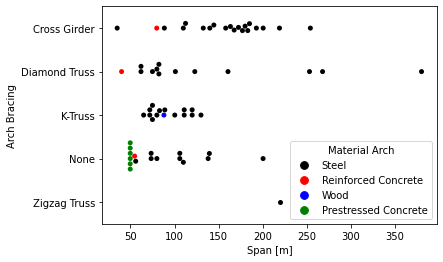

In [50]:
plt.figure(figsize=(6,4))
ax = sns.swarmplot(x=df['Span [m]'], y=df['Arch Bracing'], 
                   hue=df['Material Arch'],palette=colorName)

##### Plot swarm diagram with boxplot

C:\Users\vbalmer\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1285: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
C:\Users\vbalmer\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1286: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']


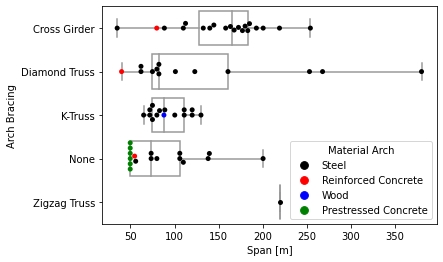

In [51]:
plt.figure(figsize=(6,4))
ax = sns.swarmplot(x=df['Span [m]'], y=df['Arch Bracing'], 
                   hue=df['Material Arch'],palette=colorName)
ax = sns.boxplot(x=df['Span [m]'], y=df['Arch Bracing'], 
                 whis=np.inf, color='white')

### 3.4 Time Series Vizualization [3]

To make a visualization example for time series we will load a new data set. The new data set inherits hourly photovoltaic electricity production [W] values of several buildings. The data is taken from a building energy simulation in Alt-Wiedikon, ZH. 
(Source: Dr. Danielle Griego)

In [52]:
# import the processed hourly demand and pv data per zone 
bl_block_pv = pd.read_csv('pv_hour_all.csv').drop(columns=['Unnamed: 0'])

In [53]:
# show data set structure
# columns: individual buildings, rows: times (hour of the year)
bl_block_pv.head(15)

Z0003  Z0004  Z0005  Z0006  Z0007  Z0008       Z0009      Z0010  \
0    0.00   0.00   0.00   0.00   0.00   0.00    0.000000   0.000000   
1    0.00   0.00   0.00   0.00   0.00   0.00    0.000000   0.000000   
2    0.00   0.00   0.00   0.00   0.00   0.00    0.000000   0.000000   
3    0.00   0.00   0.00   0.00   0.00   0.00    0.000000   0.000000   
4    0.00   0.00   0.00   0.00   0.00   0.00    0.000000   0.000000   
5    0.00   0.00   0.00   0.00   0.00   0.00    0.000000   0.000000   
6    0.00   0.00   0.00   0.00   0.00   0.00    0.000000   0.000000   
7    0.00   0.00   0.00   0.00   0.00   0.00    0.000000   0.000000   
8    0.00   0.00   0.00   0.00   0.00   0.00    0.000000   0.000000   
9   23.62   8.73  31.74  15.67  25.65  28.14   67.474316  35.496469   
10  38.79  14.36  51.56  29.90  42.49  46.56  120.470770  58.671269   
11  42.60  15.77  56.51  33.06  46.38  50.88  133.893511  64.211924   
12  43.44  16.23  58.01  33.96  47.68  52.46  139.382811  66.195327   
13  37.88  14.16  50.54  29.33  41.80  45.79  122.173655  58.185657   
14  29.18  10.83  38.85  22.20  31.69  34.71   93.611932  44.465660   

        Z0012      Z0013  ...  Z1975  Z1976  Z1978  Z1979  Z1980  Z1981  \
0    0.000000   0.000000  ...   0.00    0.0    0.0   0.00    0.0   0.00   
1    0.000000   0.000000  ...   0.00    0.0    0.0   0.00    0.0   0.00   
2    0.000000   0.000000  ...   0.00    0.0    0.0   0.00    0.0   0.00   
3    0.000000   0.000000  ...   0.00    0.0    0.0   0.00    0.0   0.00   
4    0.000000   0.000000  ...   0.00    0.0    0.0   0.00    0.0   0.00   
5    0.000000   0.000000  ...   0.00    0.0    0.0   0.00    0.0   0.00   
6    0.000000   0.000000  ...   0.00    0.0    0.0   0.00    0.0   0.00   
7    0.000000   0.000000  ...   0.00    0.0    0.0   0.00    0.0   0.00   
8    0.000000   0.000000  ...   0.00    0.0    0.0   0.00    0.0   0.00   
9   29.914581  32.302374  ...   0.11    0.0    0.0   0.00    0.0   4.49   
10  49.862684  53.335515  ...   0.22    0.0    0.0   0.06    0.0   7.40   
11  54.573284  58.376288  ...   0.24    0.0    0.0   0.07    0.0   8.15   
12  56.262132  60.171631  ...   0.24    0.0    0.0   0.08    0.0   8.31   
13  49.431005  52.865964  ...   0.20    0.0    0.0   0.07    0.0   7.27   
14  37.790825  40.409041  ...   0.14    0.0    0.0   0.06    0.0   5.54   

    Z1982  Z1983  Z1986  Z1987  
0    0.00   0.00   0.00   0.00  
1    0.00   0.00   0.00   0.00  
2    0.00   0.00   0.00   0.00  
3    0.00   0.00   0.00   0.00  
4    0.00   0.00   0.00   0.00  
5    0.00   0.00   0.00   0.00  
6    0.00   0.00   0.00   0.00  
7    0.00   0.00   0.00   0.00  
8    0.00   0.00   0.00   0.00  
9    5.67   1.46   0.51   3.09  
10   9.26   2.58   0.85   5.05  
11  10.18   2.99   0.94   5.56  
12  10.52   3.09   0.96   5.74  
13   9.17   2.82   0.83   5.01  
14   7.00   2.15   0.63   3.82  

[15 rows x 1637 columns]

<Figure size 432x288 with 0 Axes>

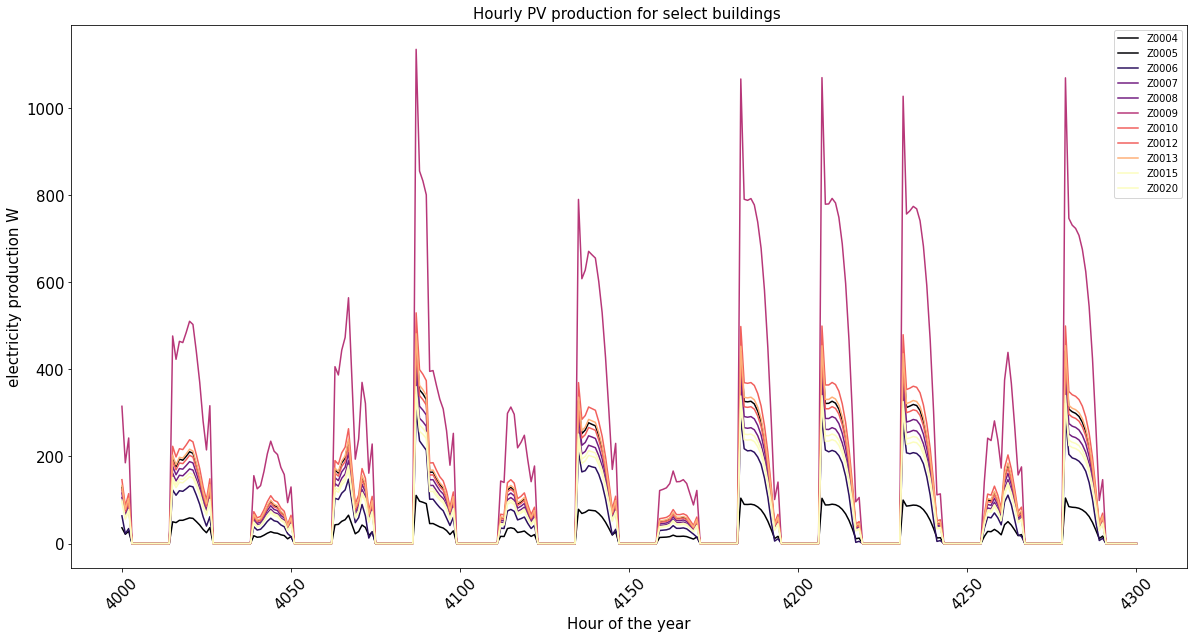

In [54]:
# plot time series (line plot)
plt.figure()
sns.color_palette("magma") #http://seaborn.pydata.org/tutorial/color_palettes.html

# select timeframe and buildings of interest --> and plot in a line plot
bl_block_pv.loc['4000':'4300','Z0004':'Z0020'].plot(kind = 'line', 
                                                    figsize=(20, 10), 
                                                    cmap=plt.cm.get_cmap('magma',7))


plt.title('Hourly PV production for select buildings ', fontsize=15)
plt.ylabel('electricity production W', fontsize=15)
plt.xlabel('Hour of the year', fontsize=15)
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='both', labelsize=15)


plt.show()

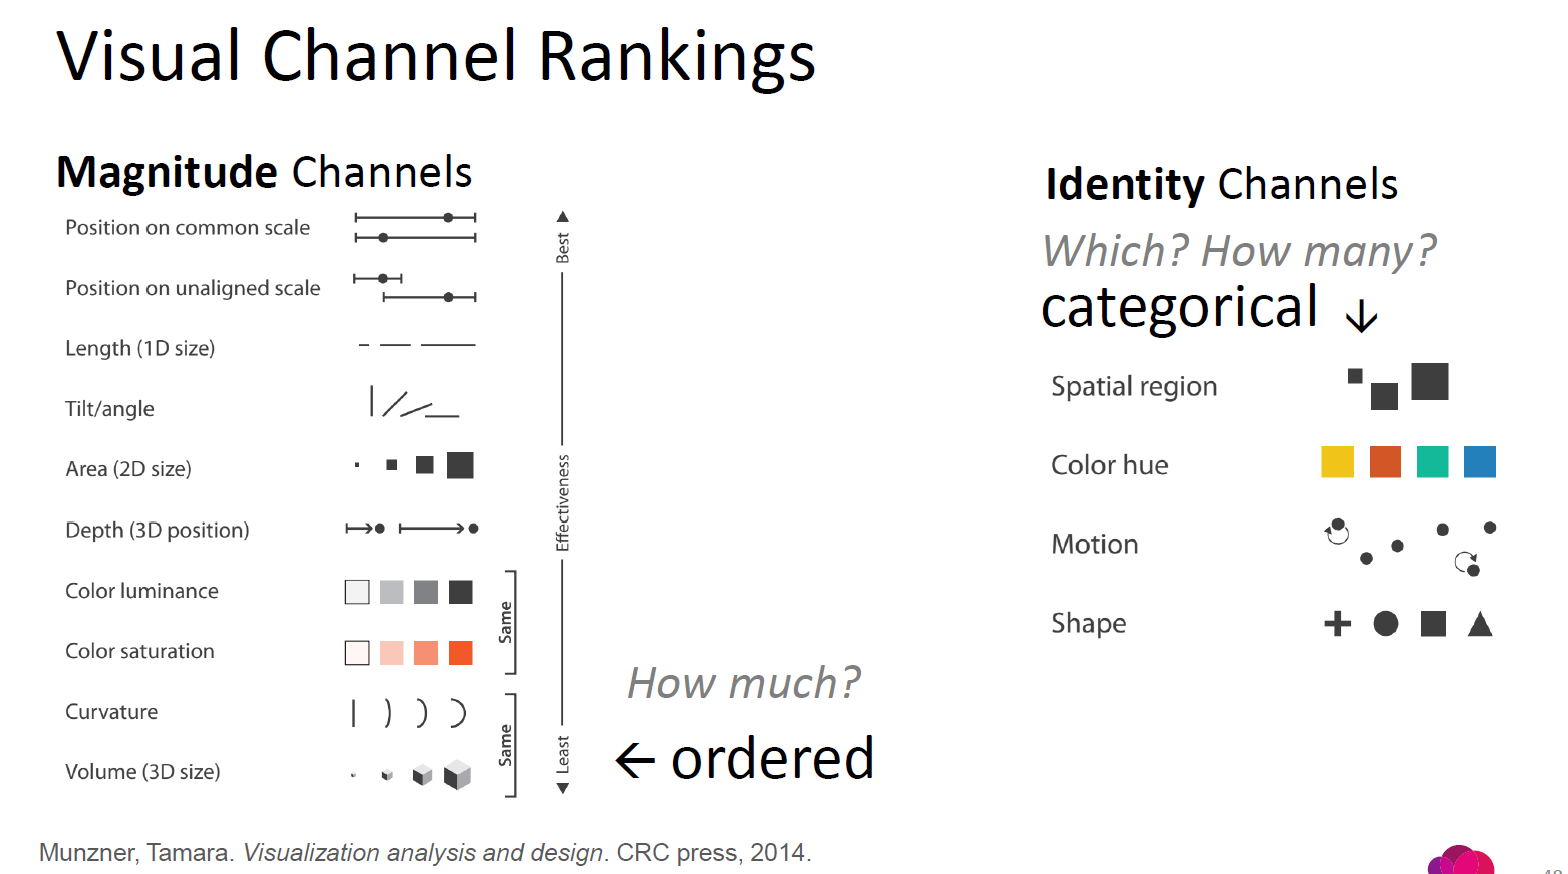

In [55]:
from IPython.display import Image
Image("VisualChannelRanking.png") 
#source: [7]

## References

- [1] Kuhn, Sophia: Parametric Modelling and Generative Design - A Multi-Step Machine Learning Approach for Design and Optimization of Network Tied-Arch Bridges. Master's Thesis. IBK, ETH Zurich, 2021.
- [2] Cavegn, Riccardo: Optimization of Network Tied-Arch Bridges. 2020
- [3] Data and code provided by Danielle Griego
- [4] https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d
- [5] https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e
- [6] https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/?sh=587b73b96f63 
- [7] El-Assady, Mennatallah: Interactive Machine Learning: Visualisation & Explainability, ETH Zürich, 2022





## Additional References for data visualization

- https://matplotlib.org/stable/gallery/color/colormap_reference.html#sphx-glr-gallery-color-colormap-reference-py

- https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html